# HIV Linelist

Tests and code for the creation of a new HIV linelist analyzer. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import stisim as ss

STIsim 0.0.8 (2023-10-04) — © 2023 by IDM


## Runing an basic simulation

In [2]:
# Network
ppl = ss.People( 10_000 )
ppl.networks = ss.ndict( ss.simple_sexual(), ss.maternal() )


# HIV settings and interventions
hiv_params = { 'beta'      : { 'simple_sexual': [ 0.0008, 0.0004], 
                               'maternal'     : [ 0.2   , 0     ]
                              },
               'initial' : 10   # Is this working with init_states?
              }
hiv = ss.HIV( pars=hiv_params )

hiv_simple_diagnostic = ss.hiv.SimpleDiagnosticTest( start=1995 )
hiv_cd4 = ss.hiv.CD4_analyzer()


# Simulation parameters
sim_params = { 'start': 1985,
               'end'  : 2050
              }


# Create and run simulation
sim = ss.Sim( pars          = sim_params,
              people        = ppl, 
              demographics  = [ ss.Pregnancy() ],   # Isn't people also demographics?
              diseases      = [ hiv, ss.Gonorrhea() ],
              interventions = [ hiv_simple_diagnostic ],
              analyzers     = [ hiv_cd4 ]
             )
sim.initialize()
sim.run()

Initializing sim (warning: not resetting sim.people) with 10000 agents
  Running 1985.0 ( 0/66) (0.00 s)  ———————————————————— 2%
  Running 1995.0 (10/66) (1.65 s)  •••————————————————— 17%
  Running 2005.0 (20/66) (1.73 s)  ••••••—————————————— 32%
  Running 2015.0 (30/66) (1.84 s)  •••••••••——————————— 47%
  Running 2025.0 (40/66) (1.94 s)  ••••••••••••———————— 62%
  Running 2035.0 (50/66) (2.08 s)  •••••••••••••••————— 77%
  Running 2045.0 (60/66) (2.24 s)  ••••••••••••••••••—— 92%


[<class 'stisim.sim.Sim'>, <class 'sciris.sc_utils.prettyobj'>, <class 'object'>]
————————————————————————————————————————————————————————————
Methods:
  finalize()          init_people()       shrink()            
  init_analyzers()    init_time_vecs()    step()              
  init_demographi...  initialize()        validate_dt()       
  init_diseases()     load()              validate_pars()     
  init_interventi...  run()               validate_post_i...  
  init_networks()     save()              
————————————————————————————————————————————————————————————
Properties:
  dt                  year                
————————————————————————————————————————————————————————————
    analyzers: #0. 'cd4_analyzer':
               [<cl [...]
     complete: True
   connectors: None
      created: None
 demographics: #0. 'pregnancy':
               [ [...]
     diseases: #0. 'hiv':
               [<class 'stisim.hiv.HI [...]
     filename: None
  initialized: True
interventions: #0. 'simpled

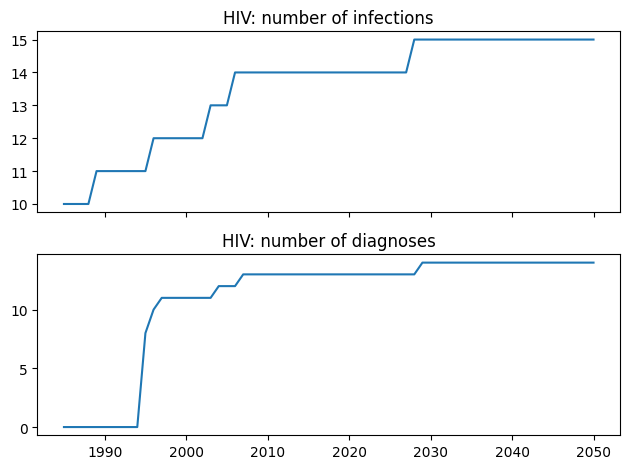

In [3]:
fig, axs = plt.subplots( 2, 1, sharex=True )

axs[0].plot( sim.yearvec, sim.results.hiv.n_infected )
axs[0].set_title( 'HIV: number of infections' )

axs[1].plot( sim.yearvec, sim.results.hiv.n_diagnosed )
axs[1].set_title( 'HIV: number of diagnoses' )

fig.tight_layout()

### Plot output of CD4 analyzer

<Axes: >

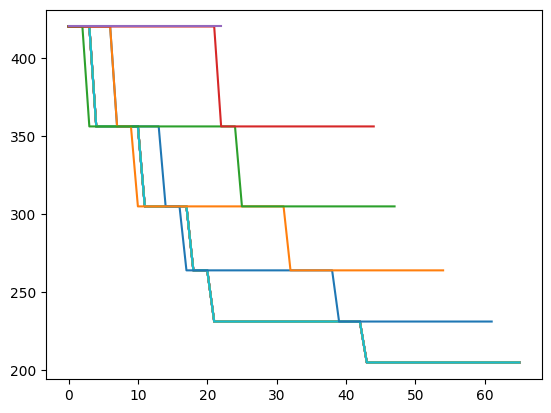

In [4]:
hiv_cd4.history.plot( legend=False )